In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishnavipenta037","key":"fcb3ea7233fdb23e29f2c338719abf40"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:08<00:00, 149MB/s]
100% 812M/812M [00:08<00:00, 96.7MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [5]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")


In [6]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


In [7]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers


In [9]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [11]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [13]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [14]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break


(16,)
(16,)
(16,)


In [15]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break


(32, 16)
(32, 16)
(32, 16)


In [16]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break


(4, 4)
(4, 4)
(4, 4)


In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [19]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 13s 109ms/step - loss: 0.7037 - accuracy: 0.5055 - val_loss: 0.6914 - val_accuracy: 0.5280
Epoch 2/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6927 - accuracy: 0.5310 - val_loss: 0.6898 - val_accuracy: 0.5340
Epoch 3/30
63/63 [==============================] - 4s 66ms/step - loss: 0.6811 - accuracy: 0.5845 - val_loss: 0.6543 - val_accuracy: 0.6260
Epoch 4/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6507 - accuracy: 0.6365 - val_loss: 0.6348 - val_accuracy: 0.6280
Epoch 5/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6216 - accuracy: 0.6600 - val_loss: 0.6391 - val_accuracy: 0.6260
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.5894 - accuracy: 0.6920 - val_loss: 0.6586 - val_accuracy: 0.6300
Epoch 7/30
63/63 [==============================] - 6s 87ms/step - loss: 0.5603 - accuracy: 0.7210 - val_loss: 0.5970 - val_accuracy: 0.6640
Epoch 8/30

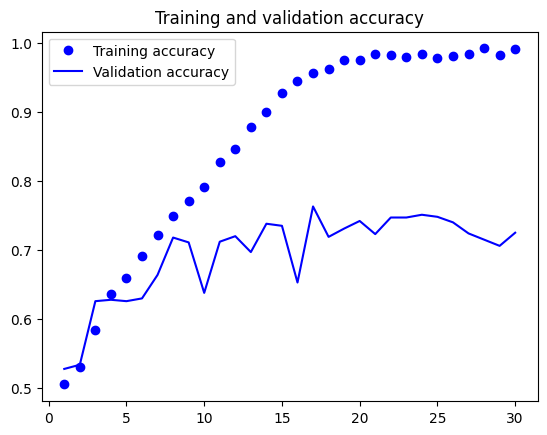

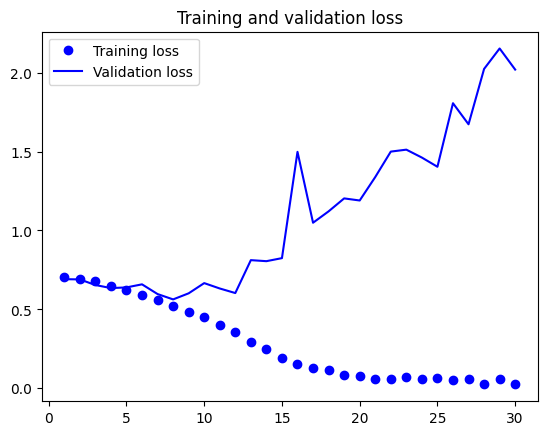

In [20]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [21]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 55ms/step - loss: 0.6165 - accuracy: 0.7030
Test accuracy: 0.703


In [22]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])


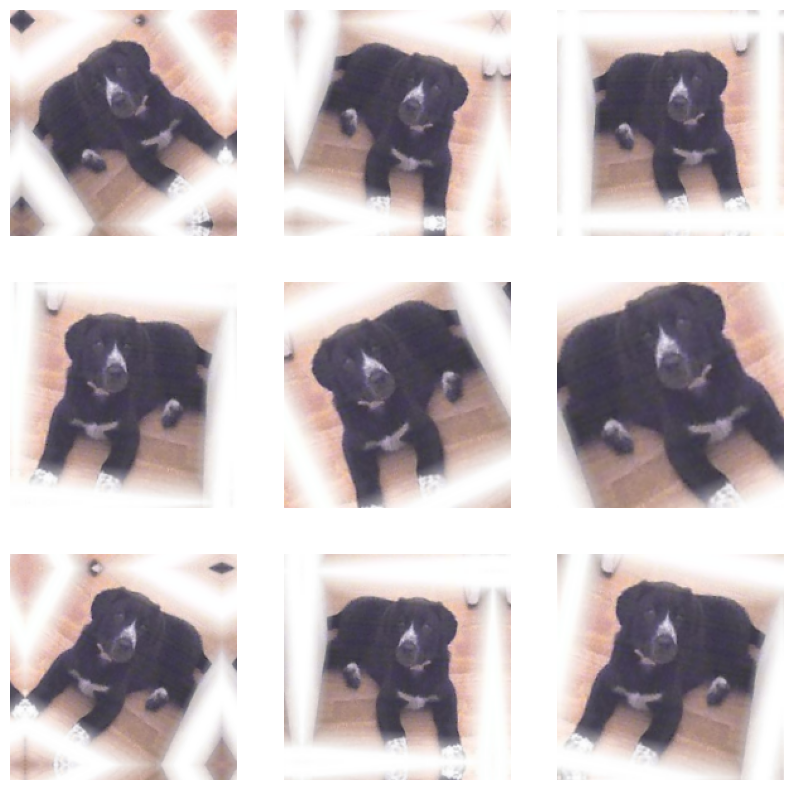

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [24]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 8s 67ms/step - loss: 0.6942 - accuracy: 0.4985 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 7s 115ms/step - loss: 0.6947 - accuracy: 0.5005 - val_loss: 0.6913 - val_accuracy: 0.5090
Epoch 3/30
63/63 [==============================] - 5s 67ms/step - loss: 0.6882 - accuracy: 0.5535 - val_loss: 0.7599 - val_accuracy: 0.4860
Epoch 4/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6781 - accuracy: 0.5845 - val_loss: 0.6912 - val_accuracy: 0.5840
Epoch 5/30
63/63 [==============================] - 6s 93ms/step - loss: 0.6618 - accuracy: 0.6150 - val_loss: 0.6955 - val_accuracy: 0.5530
Epoch 6/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6343 - accuracy: 0.6410 - val_loss: 0.6221 - val_accuracy: 0.6370
Epoch 7/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6106 - accuracy: 0.6715 - val_loss: 0.7036 - val_accuracy: 0.5670
Epoch 8/30
6

In [26]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 2s 32ms/step - loss: 0.4719 - accuracy: 0.7940
Test accuracy: 0.794


In [27]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)


58889256/58889256 [==============================] - 0s 0us/step


In [28]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [29]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


1/1 [==============================] - 0s 41ms/step


In [30]:
train_features.shape

(2000, 5, 5, 512)

In [31]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


In [32]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)


Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 20.1266 - accuracy: 0.9160 - val_loss: 3.4102 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 3.7076 - accuracy: 0.9740 - val_loss: 5.2855 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.8940 - accuracy: 0.9840 - val_loss: 5.3795 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0467 - accuracy: 0.9900 - val_loss: 7.0072 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3781 - accuracy: 0.9915 - val_loss: 8.1436 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.9945 - val_loss: 5.3242 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.9975 - val_loss: 5.7139 - val_accuracy: 0.9710
Epoch 8/20
63/63 [

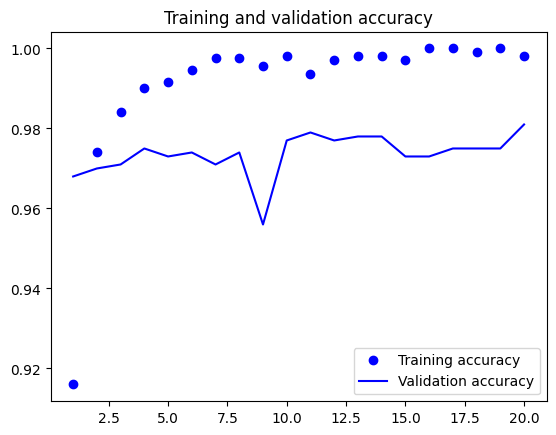

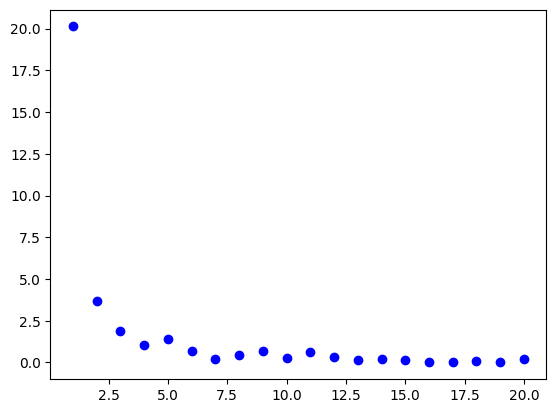

In [34]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")

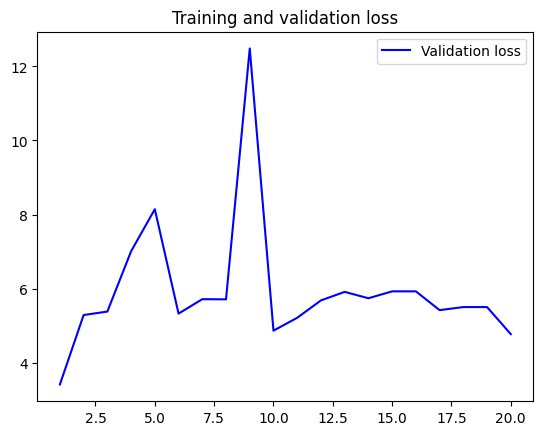

In [35]:
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [36]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False


In [37]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26


In [38]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights after freezing the conv base: 0


In [39]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])


In [40]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,  # Make sure to specify this parameter explicitly
        monitor="val_loss"
    )
]



In [42]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 13s 174ms/step - loss: 21.6524 - accuracy: 0.8965 - val_loss: 4.1829 - val_accuracy: 0.9700
Epoch 2/30
63/63 [==============================] - 13s 196ms/step - loss: 5.9432 - accuracy: 0.9465 - val_loss: 2.9806 - val_accuracy: 0.9760
Epoch 3/30
63/63 [==============================] - 11s 159ms/step - loss: 6.3279 - accuracy: 0.9465 - val_loss: 3.5928 - val_accuracy: 0.9740
Epoch 4/30
63/63 [==============================] - 10s 161ms/step - loss: 4.8933 - accuracy: 0.9615 - val_loss: 3.6527 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 10s 152ms/step - loss: 4.6082 - accuracy: 0.9675 - val_loss: 3.2060 - val_accuracy: 0.9790
Epoch 6/30
63/63 [==============================] - 12s 189ms/step - loss: 3.5431 - accuracy: 0.9695 - val_loss: 2.0868 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 10s 159ms/step - loss: 3.8972 - accuracy: 0.9685 - val_loss: 4.2159 - val_accuracy: 0.973

In [43]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 4s 100ms/step - loss: 2.6849 - accuracy: 0.9760
Test accuracy: 0.976


In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [45]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [46]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 [==============================] - 15s 198ms/step - loss: 1.1253 - accuracy: 0.9865 - val_loss: 1.6878 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 13s 211ms/step - loss: 0.4810 - accuracy: 0.9905 - val_loss: 1.5165 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 11s 175ms/step - loss: 0.5603 - accuracy: 0.9895 - val_loss: 2.2607 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 11s 168ms/step - loss: 0.4090 - accuracy: 0.9905 - val_loss: 3.1726 - val_accuracy: 0.9700
Epoch 5/30
63/63 [==============================] - 11s 173ms/step - loss: 0.5058 - accuracy: 0.9895 - val_loss: 2.3987 - val_accuracy: 0.9790
Epoch 6/30
63/63 [==============================] - 13s 201ms/step - loss: 0.2168 - accuracy: 0.9945 - val_loss: 2.6503 - val_accuracy: 0.9750
Epoch 7/30
63/63 [==============================] - 11s 174ms/step - loss: 0.2309 - accuracy: 0.9930 - val_loss: 2.9618 - val_accuracy: 0.9720

In [47]:
model = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 93ms/step - loss: 1.8023 - accuracy: 0.9770
Test accuracy: 0.977
